In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
card_details = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\card details.csv')
customer_details = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\customer details.csv',encoding= 'unicode_escape')
#To avoid encoding error, use unicode_escape
print(card_details)
print(customer_details)

         CustomerID   Income  Limit  Rating  Cards  Balance
0        0002-ORFBO  105.038   9142     734      3      232
1       0002-ORFBOA   69.820   4223     389      1      924
2       0002-ORFBOC   17.441   2430     253      1       20
3      0002-ORFBOCH   39.368   3829     248      3      813
4       0002-ORFBOH   56.375   2850     258      1      109
...             ...      ...    ...     ...    ...      ...
32542   9992-UJOELH   32.930   4222     308      4      162
32543    9993-LHIEB   12.469   5645     311      2      487
32544   9993-LHIEBH   64.167   3116     285      3      576
32545    9995-HOTOH   20.970   1356     161      2        0
32546   9995-HOTOHH   35.337   3663     261      5      176

[32547 rows x 6 columns]
                     Name    CustomerID  Age Marital Status  Gender  \
0      Katherine Bettcher    0002-ORFBO   30        Married    Male   
1        Alejandro Graham   0002-ORFBOA   71        Married    Male   
2           Priscilla Ian   0002-ORFBOC  

In [9]:
# Join the Dataset through Customer ID column
df1 = card_details.merge(customer_details,on='CustomerID')

# Data Cleaning


In [10]:
print(df1.shape)

(32547, 12)


In [12]:
print(df1.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
32542    False
32543    False
32544    False
32545    False
32546    False
Length: 32547, dtype: bool


In [14]:
print(df1.nunique())

CustomerID        32547
Income            24384
Limit              7443
Rating              679
Cards                 7
Balance            1570
Name              24942
Age                  62
Marital Status        5
Gender                2
Ethnicity             3
Education             8
dtype: int64


# Exploratory Data Analysis

In [15]:
df1.isnull().sum()

CustomerID        0
Income            0
Limit             0
Rating            0
Cards             0
Balance           0
Name              0
Age               0
Marital Status    0
Gender            0
Ethnicity         0
Education         0
dtype: int64

In [32]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32547 entries, 0 to 32546
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      32547 non-null  object 
 1   Income          32547 non-null  float64
 2   Limit           32547 non-null  int64  
 3   Rating          32547 non-null  int64  
 4   Cards           32547 non-null  int64  
 5   Balance         32547 non-null  int64  
 6   Name            32547 non-null  object 
 7   Age             32547 non-null  int64  
 8   Marital Status  32547 non-null  object 
 9   Gender          32547 non-null  object 
 10  Ethnicity       32547 non-null  object 
 11  Education       32547 non-null  object 
 12  Income_log      32547 non-null  float64
 13  Limit_log       32547 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 3.7+ MB
None


# Utilize descriptive statistics to understand the dataset's key features and distributions.

In [30]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,32547.0,46.490372,37.140511,10.627000,20.661500,33.469000,58.075000,160.231000
Limit,32547.0,4419.522322,2202.441042,1134.000000,2727.000000,4178.000000,5636.000000,11200.000000
Rating,32547.0,326.720159,136.146945,119.000000,224.000000,316.000000,405.000000,805.000000
Cards,32547.0,2.906658,1.325485,1.000000,2.000000,3.000000,4.000000,7.000000
Balance,32547.0,447.894706,454.205934,0.000000,5.000000,331.000000,749.000000,1597.000000
Age,32547.0,55.476419,16.990896,25.000000,42.000000,55.000000,69.000000,86.000000
Income_log,32547.0,3.571247,0.718447,2.363398,3.028272,3.510620,4.061735,5.076617
Limit_log,32547.0,8.259862,0.539733,7.033506,7.910957,8.337588,8.636930,9.323669


In [31]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,32547,32547,0002-ORFBO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,32547.0,NaN,NaN,NaN,46.490372,37.140511,10.627,20.6615,33.469,58.075,160.231
Limit,32547.0,NaN,NaN,NaN,4419.522322,2202.441042,1134.0,2727.0,4178.0,5636.0,11200.0
Rating,32547.0,NaN,NaN,NaN,326.720159,136.146945,119.0,224.0,316.0,405.0,805.0
Cards,32547.0,NaN,NaN,NaN,2.906658,1.325485,1.0,2.0,3.0,4.0,7.0
Balance,32547.0,NaN,NaN,NaN,447.894706,454.205934,0.0,5.0,331.0,749.0,1597.0
Name,32547,24942,Claude,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,32547.0,NaN,NaN,NaN,55.476419,16.990896,25.0,42.0,55.0,69.0,86.0
Marital Status,32547,5,Unmarried,16829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,32547,2,Female,16562,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create insightful visualizations, including histograms, box plots, and scatter plots, to identify trends and anomalies.


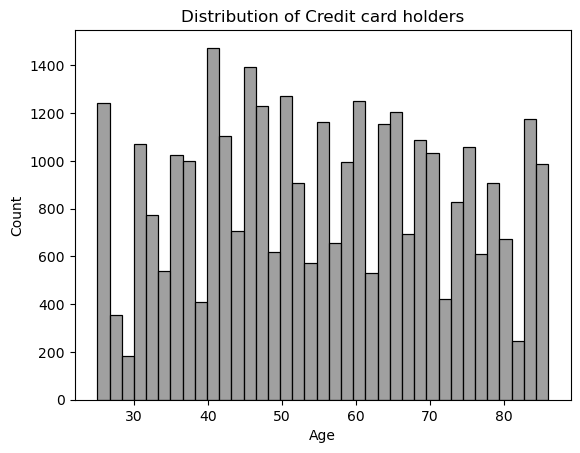

In [34]:
# Histogram
sns.histplot(df1["Age"],color='grey')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Credit card holders")
plt.show()

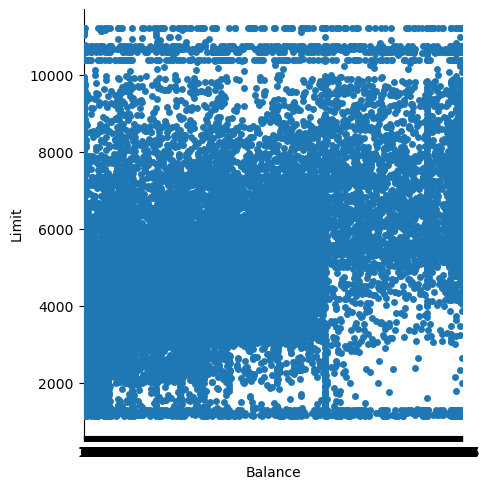

In [37]:
# Box Plot
sns.catplot(x='Balance',y='Limit',data=df1)
plt.show()

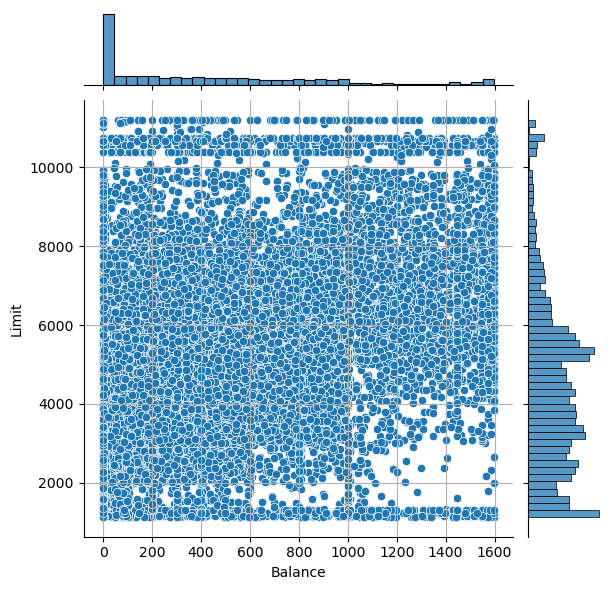

In [39]:
sns.jointplot(x='Balance',y='Limit',data=df1)
plt.grid()
plt.show()

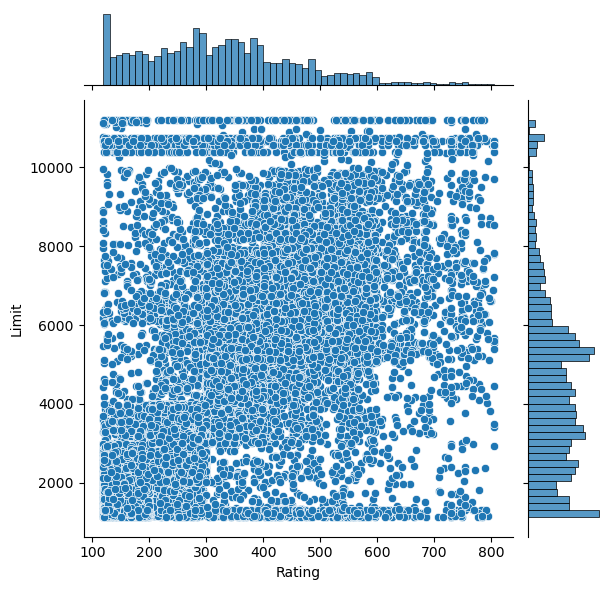

In [41]:
sns.jointplot(x='Rating',y='Limit',data=df1)
plt.show()

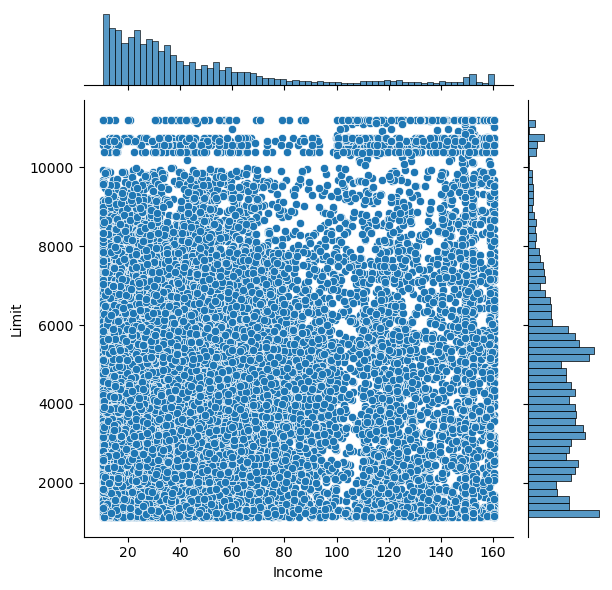

In [43]:
sns.jointplot(x='Income',y='Limit',data=df1)
plt.show()

# Analyze categorical features using pie charts and bar plots to understand their distributions.


In [45]:
ethnicity = df1.groupby('Ethnicity')['Name'].count().to_frame().reset_index()
ethnicity.columns = ('Ethnicity','Count')
ethnicity

,Ethnicity,Count
0,African American,7927
1,Asian,8240
2,Caucasian,16380


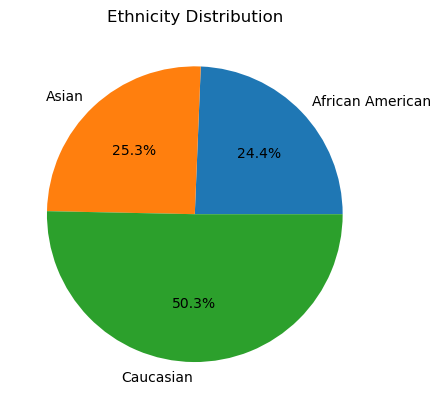

In [47]:
plt.pie(ethnicity['Count'],labels=ethnicity['Ethnicity'],autopct='%2.1f%%')
plt.title('Ethnicity Distribution')
plt.show()

In [49]:
education = df1.groupby('Education')['Name'].count().to_frame().reset_index()
education.columns = ('Education','Count')
education

,Education,Count
0,Bachelor,7342
1,Doctorate,2610
2,Elementary,3793
3,High School,465
4,Master,8781
5,Secondary,1733
6,Senior High School,2553
7,Senior Secondary,5270


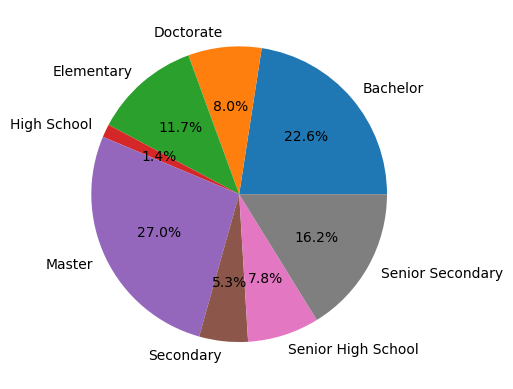

In [50]:
x = education['Education']
y = education['Count']

plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

In [52]:
marital_status = df1['Marital Status'].value_counts().reset_index()
marital_status.columns = ('Marital Status','Count')
marital_status = marital_status.sort_values(by='Marital Status')
marital_status

,Marital Status,Count
2,Divorced,51
1,Married,15621
3,Seperated,37
0,Unmarried,16829
4,Widow,9


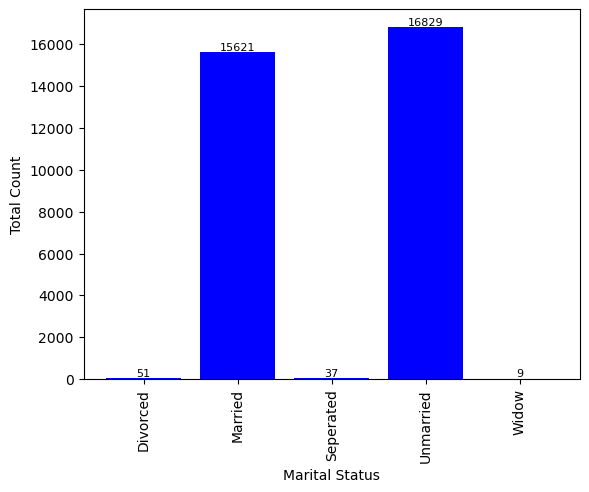

In [54]:
x = marital_status['Marital Status']
y = marital_status['Count']

plt.bar(x,y,color='Blue')
plt.xlabel('Marital Status')
plt.ylabel('Total Count')
plt.xticks(rotation = 'vertical')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha = 'center',va = 'bottom',fontsize=8)
plt.show()

In [56]:
gender = df1['Gender'].value_counts().reset_index()
gender.columns = ('Gender','Count')
gender

,Gender,Count
0,Female,16562
1,Male,15985


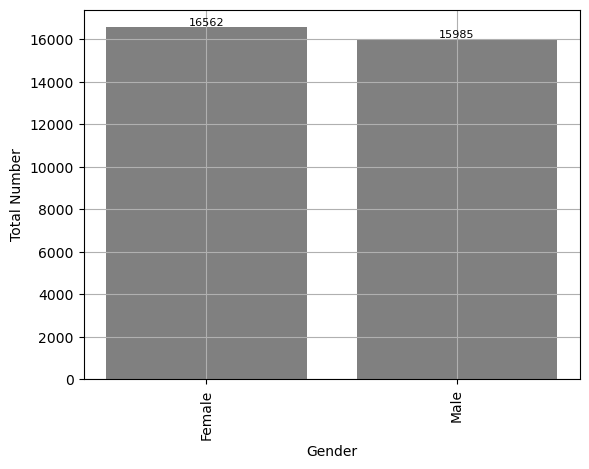

In [57]:
x = gender['Gender']
y = gender['Count']

plt.bar(x,y,color = 'Grey')
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.xticks(rotation = 'vertical')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.grid()
plt.show()

# Identify outliers and patterns in the data using appropriate statistical methods.

In [62]:
def outliers (data,series):
    q1,q3 = np.percentile(data[series],[25,75])
    iqr = q3-q1
    lower_extreme = q1-1.5*iqr
    upper_extreme = q3+1.5*iqr
    print(f'Lower Extreme : {lower_extreme}')
    print(f'Upper Extreme : {upper_extreme}')
    ndf = df1.loc[(data[series]>lower_extreme) & (data[series]<upper_extreme)]
    return ndf

In [63]:
ndf = outliers(df1,'Income')
ndf

Lower Extreme : -35.458749999999995
Upper Extreme : 114.19525


,CustomerID,Income,Limit,Rating,Cards,Balance,Name,Age,Marital Status,Gender,Ethnicity,Education,Income_log,Limit_log
0,0002-ORFBO,105.038,9142,734,3,232,Katherine Bettcher,30,Married,Male,Caucasian,Master,4.654322,9.120634
1,0002-ORFBOA,69.820,4223,389,1,924,Alejandro Graham,71,Married,Male,Asian,Bachelor,4.245921,8.348301
2,0002-ORFBOC,17.441,2430,253,1,20,Priscilla Ian,46,Seperated,Male,African American,Senior Secondary,2.858824,7.795647
3,0002-ORFBOCH,39.368,3829,248,3,813,Ovella,42,Married,Female,Caucasian,Senior Secondary,3.672953,8.250359
4,0002-ORFBOH,56.375,2850,258,1,109,Juliann,30,Married,Male,African American,Doctorate,4.032026,7.955074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,9992-UJOELH,32.930,4222,308,4,162,Oletta,34,Unmarried,Male,Caucasian,Bachelor,3.494384,8.348064
32543,9993-LHIEB,12.469,5645,311,2,487,Leesa Hugo,61,Married,Female,Caucasian,Senior High School,2.523246,8.638525
32544,9993-LHIEBH,64.167,3116,285,3,576,Oliva,64,Unmarried,Male,Caucasian,Senior Secondary,4.161489,8.044305
32545,9995-HOTOH,20.970,1356,161,2,0,Hank Hunter,77,Unmarried,Female,Caucasian,Bachelor,3.043093,7.212294


In [64]:
df1 = ndf
ndf = outliers(df1,'Balance')
ndf

Lower Extreme : -1064.5
Upper Extreme : 1779.5


,CustomerID,Income,Limit,Rating,Cards,Balance,Name,Age,Marital Status,Gender,Ethnicity,Education,Income_log,Limit_log
0,0002-ORFBO,105.038,9142,734,3,232,Katherine Bettcher,30,Married,Male,Caucasian,Master,4.654322,9.120634
1,0002-ORFBOA,69.820,4223,389,1,924,Alejandro Graham,71,Married,Male,Asian,Bachelor,4.245921,8.348301
2,0002-ORFBOC,17.441,2430,253,1,20,Priscilla Ian,46,Seperated,Male,African American,Senior Secondary,2.858824,7.795647
3,0002-ORFBOCH,39.368,3829,248,3,813,Ovella,42,Married,Female,Caucasian,Senior Secondary,3.672953,8.250359
4,0002-ORFBOH,56.375,2850,258,1,109,Juliann,30,Married,Male,African American,Doctorate,4.032026,7.955074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,9992-UJOELH,32.930,4222,308,4,162,Oletta,34,Unmarried,Male,Caucasian,Bachelor,3.494384,8.348064
32543,9993-LHIEB,12.469,5645,311,2,487,Leesa Hugo,61,Married,Female,Caucasian,Senior High School,2.523246,8.638525
32544,9993-LHIEBH,64.167,3116,285,3,576,Oliva,64,Unmarried,Male,Caucasian,Senior Secondary,4.161489,8.044305
32545,9995-HOTOH,20.970,1356,161,2,0,Hank Hunter,77,Unmarried,Female,Caucasian,Bachelor,3.043093,7.212294


In [65]:
df1 = ndf
ndf = outliers(df1,'Rating')
ndf

Lower Extreme : -36.0
Upper Extreme : 652.0


,CustomerID,Income,Limit,Rating,Cards,Balance,Name,Age,Marital Status,Gender,Ethnicity,Education,Income_log,Limit_log
1,0002-ORFBOA,69.820,4223,389,1,924,Alejandro Graham,71,Married,Male,Asian,Bachelor,4.245921,8.348301
2,0002-ORFBOC,17.441,2430,253,1,20,Priscilla Ian,46,Seperated,Male,African American,Senior Secondary,2.858824,7.795647
3,0002-ORFBOCH,39.368,3829,248,3,813,Ovella,42,Married,Female,Caucasian,Senior Secondary,3.672953,8.250359
4,0002-ORFBOH,56.375,2850,258,1,109,Juliann,30,Married,Male,African American,Doctorate,4.032026,7.955074
5,0002-ORFBOW,53.016,6136,574,2,438,Olaf,52,Unmarried,Female,Caucasian,Elementary,3.970594,8.721928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,9992-UJOELH,32.930,4222,308,4,162,Oletta,34,Unmarried,Male,Caucasian,Bachelor,3.494384,8.348064
32543,9993-LHIEB,12.469,5645,311,2,487,Leesa Hugo,61,Married,Female,Caucasian,Senior High School,2.523246,8.638525
32544,9993-LHIEBH,64.167,3116,285,3,576,Oliva,64,Unmarried,Male,Caucasian,Senior Secondary,4.161489,8.044305
32545,9995-HOTOH,20.970,1356,161,2,0,Hank Hunter,77,Unmarried,Female,Caucasian,Bachelor,3.043093,7.212294


In [66]:
df1 = ndf

# Conduct correlation analysis to identify the relationships between numerical variables.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8840\4262696958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


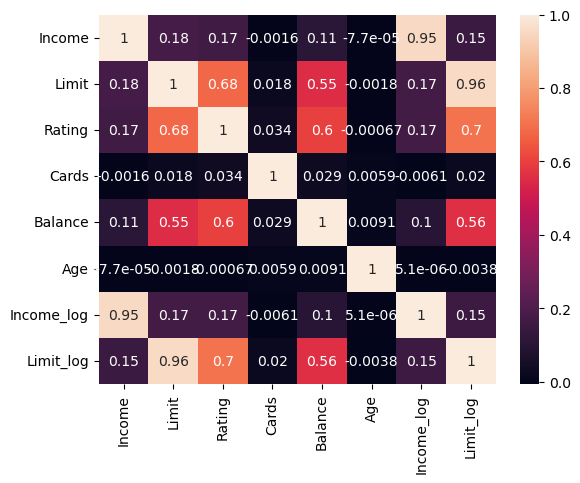

In [67]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Calculate measures of central tendency (mean, median, mode) and dispersion (variance, standard deviation) for relevant variables.

In [68]:
age_mean = np.mean(df1['Age'])
print(f'Mean of Age : {round(age_mean,2)}')
age_median = np.median(df1['Age'])
print(f'Median of Age : {round(age_median,2)}')
# age_mode = mode(df1['Age'])
# print(f'Mode of Age : {round(age_mode,2)}')
age_variance = np.var(df1['Age'])
print(f'Variance of Age : {round(age_variance,2)}')
age_standard_deviation = np.std(df1['Age'])
print(f'Standard Deviation of Age : {round(age_standard_deviation,2)}')

Mean of Age : 55.52
Median of Age : 55.0
Variance of Age : 288.66
Standard Deviation of Age : 16.99


In [70]:
income_mean = np.mean(df1['Income'])
print(f'Mean of Income : {round(income_mean,2)}')
income_median = np.median(df1['Income'])
print(f'Median of Income : {round(income_median,2)}')
income_variance = np.var(df1['Income'])
print(f'Variance of Income : {round(income_variance,2)}')
income_standard_deviation = np.std(df1['Income'])
print(f'Standard Deviation of Income : {round(income_standard_deviation,2)}')

Mean of Income : 36.69
Median of Income : 30.31
Variance of Income : 505.26
Standard Deviation of Income : 22.48


In [71]:
limit_mean = np.mean(df1['Limit'])
print(f'Mean of Limit : {round(limit_mean,2)}')
limit_median = np.median(df1['Limit'])
print(f'Median of Limit : {round(limit_median,2)}')
limit_variance = np.var(df1['Limit'])
print(f'Variance of Limit : {round(limit_variance,2)}')
limit_standard_deviation = np.std(df1['Limit'])
print(f'Standard Deviation of Limit : {round(limit_standard_deviation,2)}')

Mean of Limit : 4251.23
Median of Limit : 4091.0
Variance of Limit : 3998615.55
Standard Deviation of Limit : 1999.65


In [73]:
balance_mean = np.mean(df1['Balance'])
print(f'Mean of Balance : {round(balance_mean,2)}')
balance_median = np.median(df1['Balance'])
print(f'Median of Balance : {round(balance_median,2)}')
balance_variance = np.var(df1['Balance'])
print(f'Variance of Balance : {round(balance_variance,2)}')
balance_standard_deviation = np.mean(df1['Balance'])
print(f'Standard Deviation of Balance : {round(balance_standard_deviation,2)}')

Mean of Balance : 422.22
Median of Balance : 303.0
Variance of Balance : 190691.68
Standard Deviation of Balance : 422.22


In [74]:
cards_mean = np.mean(df1['Cards'])
print(f'Mean of Cards : {round(cards_mean,2)}')
cards_median = np.median(df1['Cards'])
print(f'Median of Cards : {round(cards_median,2)}')
cards_variance = np.var(df1['Cards'])
print(f'Variance of Cards : {round(cards_variance,2)}')
cards_standard_deviation = np.std(df1['Cards'])
print(f'Standard Deviation of Cards : {round(cards_standard_deviation,2)}')

Mean of Cards : 2.89
Median of Cards : 3.0
Variance of Cards : 1.74
Standard Deviation of Cards : 1.32


# Analyze the distribution of gender, ethnicity, education level, and marital status among the individuals.

In [75]:
Gender = df1['Gender'].value_counts().reset_index()
Gender.columns = ('Gender','Count')
Gender

,Gender,Count
0,Female,14784
1,Male,14305


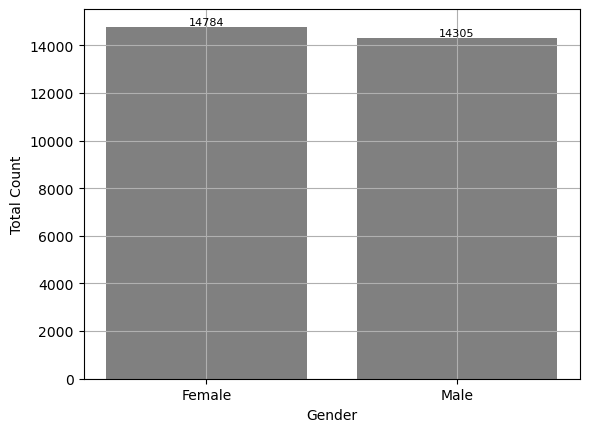

In [76]:
x = Gender['Gender']
y = Gender['Count']
plt.bar(x,y,color = 'Grey')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.grid()
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.show()

In [77]:
Ethnicity = df1['Ethnicity'].value_counts().reset_index()
Ethnicity.columns = ('Ethnicity','Count')
Ethnicity

,Ethnicity,Count
0,Caucasian,14683
1,Asian,7349
2,African American,7057


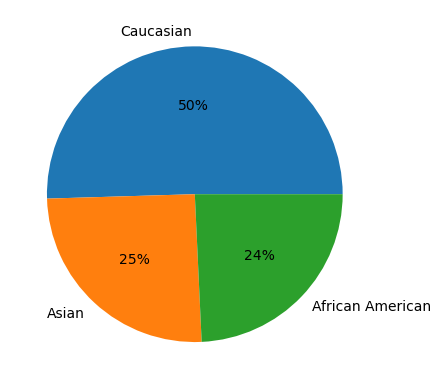

In [78]:
plt.pie(Ethnicity['Count'],labels=Ethnicity['Ethnicity'],autopct='%1.f%%')
plt.show()

In [79]:
Education = df1['Education'].value_counts().reset_index()
Education.columns = ('Education','Count')
Educationplt.pie(Education['Count'],labels=Education['Education'],autopct='%1.f1%%')
plt.show()

,Education,Count
0,Master,7863
1,Bachelor,6527
2,Senior Secondary,4678
3,Elementary,3391
4,Doctorate,2356
5,Senior High School,2292
6,Secondary,1567
7,High School,415


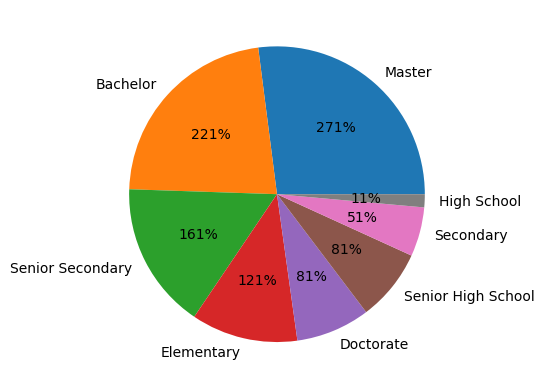

In [80]:
plt.pie(Education['Count'],labels=Education['Education'],autopct='%1.f1%%')
plt.show()

In [82]:
Marital_Status = df1['Marital Status'].value_counts().reset_index()
Marital_Status.columns = ('Marital Status','Count')
Marital_Status

,Marital Status,Count
0,Unmarried,15081
1,Married,13919
2,Divorced,49
3,Seperated,33
4,Widow,7


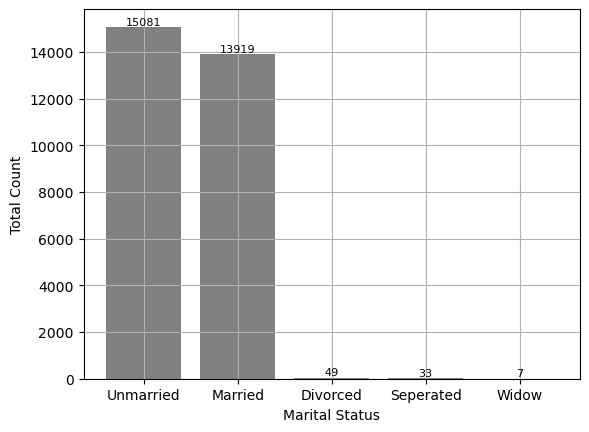

In [83]:
x = Marital_Status['Marital Status']
y = Marital_Status['Count']
plt.bar(x,y,color='Grey')
plt.xlabel('Marital Status')
plt.ylabel('Total Count')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize = 8)
plt.grid()
plt.show()

# Explore the relationship between income and credit limit using correlation and regression analysis.

In [86]:
income_limit = df1['Income'].corr(df1['Limit'])
(f'Correlation Between Income and Limit : {round(income_limit*100,2)}%')

'Correlation Between Income and Limit : 17.64%'

# Assess the impact of education level on credit limits by comparing different groups.

In [87]:
education_groups = df1.groupby('Education')['Limit'].count()
education_groups

Education
Bachelor              6527
Doctorate             2356
Elementary            3391
High School            415
Master                7863
Secondary             1567
Senior High School    2292
Senior Secondary      4678
Name: Limit, dtype: int64

# Calculate the average number of cards owned by individuals and analyze its relationship with credit limits.

In [88]:
average_cards = df1['Cards'].mean()
(f'Average Number of Cards : {round(average_cards,2)}')

'Average Number of Cards : 2.89'

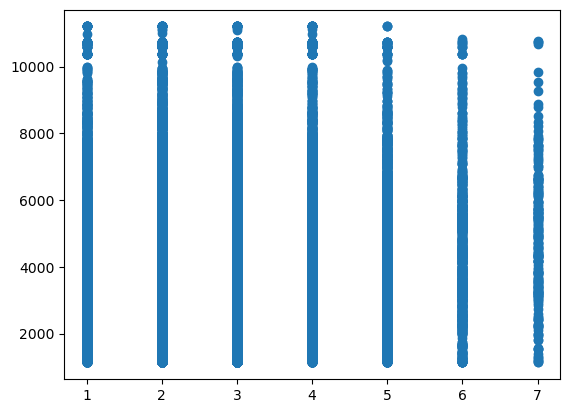

In [90]:
plt.scatter(df1['Cards'],df1['Limit'])
plt.show()

In [91]:
card_limit = df1['Cards'].corr(df1['Limit'])
(f'Correlation between Number of Cards and Limit : {round(card_limit,2)}')

'Correlation between Number of Cards and Limit : 0.02'

# Evaluate the distribution of account balances and identify individuals with high or low balances.

In [92]:
balance_stats = df1['Balance'].describe()
balance_stats

count    29089.000000
mean       422.222111
std        436.690097
min          0.000000
25%          0.000000
50%        303.000000
75%        705.000000
max       1597.000000
Name: Balance, dtype: float64

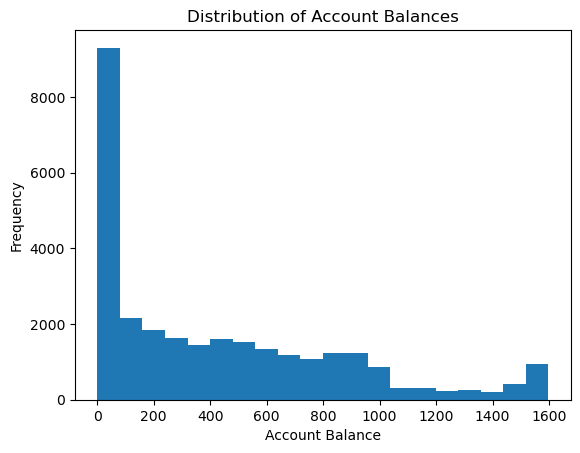

In [93]:
plt.hist(df1['Balance'],bins=20)
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Account Balances')
plt.show()

In [94]:
balance_threshold = df1['Balance'].quantile(0.95)
high_balance_individuals = df1[df1['Balance'] >= balance_threshold]
high_balance_individuals

,CustomerID,Income,Limit,Rating,Cards,Balance,Name,Age,Marital Status,Gender,Ethnicity,Education,Income_log,Limit_log
9,0003-MKNFEA,23.672,6164,417,4,1448,Marcus Rowan,62,Unmarried,Male,Caucasian,Master,3.164293,8.726481
30,0011-IGKFFX,77.751,5676,450,3,1448,Godin,40,Unmarried,Female,Asian,Senior Secondary,4.353511,8.644002
60,0014-BMAQUH,41.860,7228,621,5,1474,Julietta,30,Unmarried,Male,Caucasian,Master,3.734331,8.885718
81,0017-DINOCA,37.346,5616,404,4,1523,Alexander,46,Married,Male,African American,Bachelor,3.620226,8.633375
88,0017-IUDMW,24.729,8605,559,4,1448,Micheline Camp,40,Unmarried,Female,Caucasian,Master,3.207977,9.060099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32369,9866-OCCKE,53.930,1233,565,4,1480,Rasheeda Garrett,76,Unmarried,Male,Asian,Senior High School,3.987687,7.117206
32463,9933-QRGTX,29.588,9391,568,1,1549,Franchesca Gwendolyn,75,Unmarried,Male,African American,Senior High School,3.387369,9.147507
32490,9950-MTGYXH,54.801,10673,523,4,1539,Honora,33,Married,Female,African American,Secondary,4.003708,9.275472
32504,9962-BFPDUH,101.239,10977,457,1,1587,Laraine,26,Married,Female,Caucasian,Doctorate,4.617484,9.303557


In [95]:
balance_threshold = df1['Balance'].quantile(0.05)
low_balance_individuals = df1[df1['Balance'] <= balance_threshold]
low_balance_individuals

,CustomerID,Income,Limit,Rating,Cards,Balance,Name,Age,Marital Status,Gender,Ethnicity,Education,Income_log,Limit_log
7,0002-ORFBOZ,16.429,2594,120,4,0,Carmita,25,Married,Female,African American,Bachelor,2.799048,7.860956
16,0004-TLHLJ,16.303,1134,130,2,0,Micki Link,64,Unmarried,Male,Caucasian,Bachelor,2.791349,7.033506
21,0004-TLHLJW,75.566,4707,369,1,0,Ozell,45,Married,Female,Caucasian,Secondary,4.325006,8.456806
24,0011-IGKFF,20.490,1179,152,5,0,Charise Balog,35,Unmarried,Female,Caucasian,Master,3.019937,7.072422
26,0011-IGKFFC,19.143,2708,168,2,0,Prudence Inez,56,Married,Male,African American,Bachelor,2.951937,7.903966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32525,9975-GPKZU,10.645,1841,140,3,0,Ying Hillary,41,Unmarried,Male,Caucasian,Senior High School,2.365090,7.518064
32527,9975-SKRNR,18.596,1580,136,3,0,Keli Holly,63,Unmarried,Female,Caucasian,Senior Secondary,2.922947,7.365180
32535,9986-BONCE,69.231,2272,132,3,0,Shaniqua Howard,60,Unmarried,Female,African American,Senior Secondary,4.237449,7.728416
32537,9987-LUTYD,13.560,1233,167,3,0,Adina Hubert,75,Married,Male,Caucasian,Master,2.607124,7.117206
